In [ ]:
import torch
import torch.nn as nn

Input layer can't be normalized in a naive way. Let $x$ be input layer, if i just normalize input like $x + b - \mathbf{E}[x + b]$. Then if $b$ is updated as $b = b + \Delta b$, and $\Delta b \propto \frac{\partial f}{\partial b}$. But 
$$\begin{aligned}
x + b + \Delta b - \mathbf{E}[x + b + \Delta b] 
&= x + b + \Delta b - \mathbf{E}[x + b] - \Delta b \\
&= x + b - \mathbf{E}[x + b]
\end{aligned}$$
It doesn't change the output, so the loss.

Make a `SimpleNet` that approximates a simple function $f(x) = x + 20$

In [ ]:
class SimpleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.b = nn.Parameter(torch.zeros(1))
  def forward(self, x):
    # normalize x
    pred = x + self.b
    pred_mean = pred.mean()
    x_mean_not_grad = pred_mean.detach()
    pred = pred - x_mean_not_grad
    return pred


Create data such that y = x + 20

In [ ]:
x = torch.arange(100, dtype=torch.float)
y = x + 20

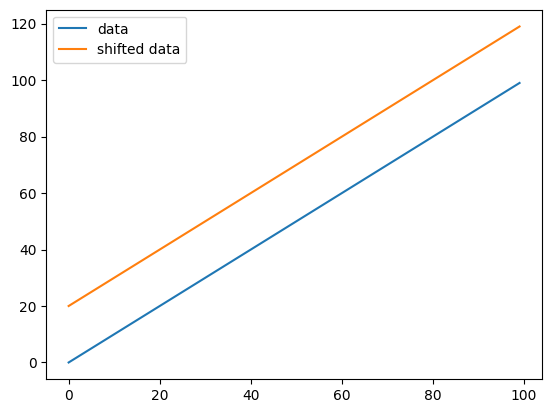

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, x, label='data')
plt.plot(x, y, label='shifted data')
plt.legend()
plt.show()

In [ ]:
def l2_loss(pred, target):
  return ((pred - target) ** 2).mean()

In [ ]:
model = SimpleNet()
optimizer = torch.optim.SGD(model.parameters())

In [ ]:
from tqdm import tqdm
losses = []
b_values = []
NUM_EPOCH = 10000
loop = tqdm(range(NUM_EPOCH))
for i in loop:
  optimizer.zero_grad()
  pred = model(x)
  loss = l2_loss(pred, y)
  loss.backward()
  optimizer.step()
  loop.set_description(f'EPOCH {i} | {NUM_EPOCH}: loss: {loss.item():.4f}')
  b_values.append(model.b.item())
  losses.append(loss.item())

EPOCH 9999 | 10000: loss: 4830.2339: 100%|██████████| 10000/10000 [00:18<00:00, 529.02it/s]


This plot graphs loss produced by model above, its loss is constant which proves the loss doesn't change. 

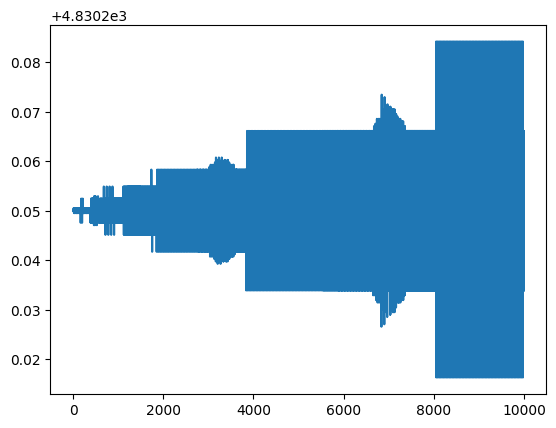

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

$\frac{\partial loss}{\partial b} > 0$, then $b$ will be increased each time algorithm updates weights, $b$ is exploded because updated $b$ doesn't have any effects to loss. 

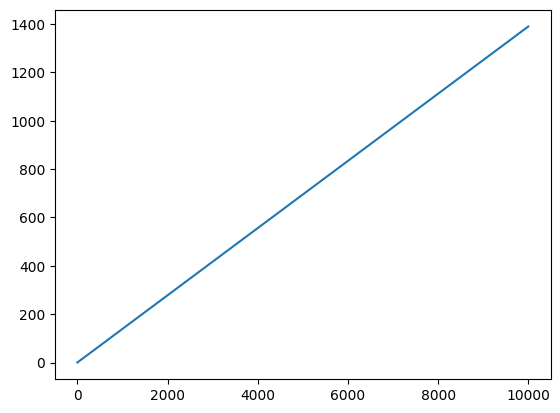

In [ ]:
plt.plot(b_values, label='b')
plt.show()